<h1 style="text-align:center;">LIFE EXPECTANCY ANALYSIS</h1>

* Life Expectancy Data Source: https://www.kaggle.com/kumarajarshi/life-expectancy-who

In [1]:
import pandas as pd                      # for data analysis
import numpy as np                       # for mathematical operations on array
import requests                          # for making http requests
from bs4 import BeautifulSoup            # for web scraping
import warnings                          # suppress all future warning
warnings.filterwarnings('ignore')
from sklearn import linear_model         # for linear regression
import seaborn as sns                    # for data visualization
from sklearn.model_selection import train_test_split                      # for splitting train and test data  
import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus
import sys
from sklearn.preprocessing import MinMaxScaler                            # for normalizing data
from sklearn.model_selection import KFold                    # for cross validation

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
life_expectancy = pd.read_csv('Life Expectancy Data.csv')

In [4]:
life_expectancy.head(1)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.25921,33736494.0,17.2,17.3,0.479,10.1


<h1 style="text-align:center;">DATA DESCRIPTION</h1>

* 23 columns, 2835 rows
* countries: 177 different countries
* Year: from 2000 to 2015
* life_expectancy: Life expectancy in age
* Alcohol: Recorded per capita (15+) consumption (in litres of pure alcohol)
* hepB: Hepatitis B (hepB) immunization coverage among 1-year-olds (%)
* Measles: Number of reported cases per 1000 population
* deaths_U5: Number of under-five deaths per 1000 population 
* Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)
* total_expenditure: General government expenditure on health as a percentage of total government expenditure (%)
* diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
* hiv_aids: Deaths per 1 000 live births HIV/AIDS (0-4 years)
* GDP: Gross Domestic Product per capita (in USD)
* Population: Updeated population of the country
* income_composition: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
* Schooling: Number of years of Schooling(years)
* Status: Developed countries as 1, developing countries as 0
* latitude: latitude of a country
* longitude: longitude of a country
* Crime_Index: Estimation of overall level of crime in a given country. Consider crime levels lower than 20 as very low, 20-40 as being low, 40-60 as being moderate, 60-80 as being high, and crime levels higher than 80 as being very high
* Cigarettes_per_day: Annual Cigarette Consumption per person aged 15 or older
* Depression_Population: Depression population from a coutry between 2000-2015
* Cannabis_Recreational: Cannabis for recreational use in a country, legal as 1, otherwise 0
* Cannabis_Medical: Cannabis for medical use in a country, legal as 1, otherwise 0

<h1 style="text-align:center;">Cleaning Life Expectancy dataset</h1>

In [5]:
# get dummy on column "Status"
life_expectancy['Status_1'] = np.NAN
life_expectancy['Status_1'] = (life_expectancy['Status'] == 'Developed').astype(int)

# drop existing Status column and rename all the columns
life_expectancy.drop('Status',axis = 1,inplace=True)
life_expectancy.rename(columns= {'Country':'country','Diphtheria ':'diphtheria',' BMI ':'bmi',\
                                 'Hepatitis B':'hepB',' HIV/AIDS':'hiv_aids','Total expenditure':'total_expenditure',\
                                 'under-five deaths ':'deaths_U5','infant deaths':'infant_deaths','Adult Mortality':'adult_mortality',\
                                 'Status_1' : 'Status', 'Income composition of resources':'income_composition',\
                                 'Life expectancy ' : 'life_expectancy', 'percentage expenditure' : 'expenditure_%',\
                                 ' thinness  1-19 years' : 'thinness_1_19',' thinness 5-9 years' : 'thinness_5_9'},inplace=True) 

In [6]:
life_expectancy.head(1)

,country,Year,life_expectancy,adult_mortality,infant_deaths,Alcohol,expenditure_%,hepB,Measles,bmi,deaths_U5,Polio,total_expenditure,diphtheria,hiv_aids,GDP,Population,thinness_1_19,thinness_5_9,income_composition,Schooling,Status
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.25921,33736494.0,17.2,17.3,0.479,10.1,0


In [7]:
life_expectancy.columns

Index(['country', 'Year', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'Alcohol', 'expenditure_%', 'hepB', 'Measles ', 'bmi',
       'deaths_U5', 'Polio', 'total_expenditure', 'diphtheria', 'hiv_aids',
       'GDP', 'Population', 'thinness_1_19', 'thinness_5_9',
       'income_composition', 'Schooling', 'Status'],
      dtype='object')

In [8]:
life_expectancy.isna().sum()

country                 0
Year                    0
life_expectancy        10
adult_mortality        10
infant_deaths           0
Alcohol               194
expenditure_%           0
hepB                  553
Measles                 0
bmi                    34
deaths_U5               0
Polio                  19
total_expenditure     226
diphtheria             19
hiv_aids                0
GDP                   448
Population            652
thinness_1_19          34
thinness_5_9           34
income_composition    167
Schooling             163
Status                  0
dtype: int64

In [9]:
#fill Nan values with each column's average

life_expectancy.life_expectancy.fillna(life_expectancy.life_expectancy.mean(),inplace=True)
life_expectancy.adult_mortality.fillna(life_expectancy.adult_mortality.mean(),inplace=True)
life_expectancy.Alcohol.fillna(life_expectancy.Alcohol.mean(),inplace=True)
life_expectancy.hepB.fillna(life_expectancy.hepB.mean(),inplace= True)
life_expectancy.bmi.fillna(life_expectancy.bmi.mean(),inplace=True)
life_expectancy.Polio.fillna(life_expectancy.Polio.mean(),inplace=True)
life_expectancy.total_expenditure.fillna(life_expectancy.total_expenditure.mean(),inplace=True)
life_expectancy.diphtheria.fillna(life_expectancy.bmi.mean(),inplace=True)
life_expectancy.GDP.fillna(life_expectancy.GDP.mean(),inplace=True)
life_expectancy.Population.fillna(life_expectancy.Population.mean(),inplace=True)
life_expectancy.thinness_1_19.fillna(life_expectancy.thinness_1_19.mean(),inplace=True)
life_expectancy.thinness_5_9.fillna(life_expectancy.thinness_5_9.mean(),inplace=True)
life_expectancy.income_composition.fillna(life_expectancy.income_composition.mean(),inplace=True)
life_expectancy.Schooling.fillna(life_expectancy.Schooling.mean(),inplace=True)

In [10]:
life_expectancy.isna().sum()

country               0
Year                  0
life_expectancy       0
adult_mortality       0
infant_deaths         0
Alcohol               0
expenditure_%         0
hepB                  0
Measles               0
bmi                   0
deaths_U5             0
Polio                 0
total_expenditure     0
diphtheria            0
hiv_aids              0
GDP                   0
Population            0
thinness_1_19         0
thinness_5_9          0
income_composition    0
Schooling             0
Status                0
dtype: int64

<h1 style="text-align:center;">CLEANING UP AND MERGING CRIME INDEX DATASET</h1>

In [11]:
coordinates = pd.read_csv('world_country_and_usa_states_latitude_and_longitude_values.csv')

In [12]:
life_expectancy = life_expectancy.merge(coordinates.loc[:,'country_code' : 'country'], how='left', on='country')

In [13]:
#web scraping section
#get crime index data from website and save it as a csv file

URL = "https://www.numbeo.com/crime/rankings_by_country.jsp"
page = requests.get(URL)

soup = BeautifulSoup(page.text, "html.parser")

table = soup.find_all('table')[1]#.find_all('td')#.find_all('a')[0].string

final_data = []
for a in table.find_all('tbody'):
    rows = a.find_all('td')
    for row in rows:
        final_data.append(row.text.strip().strip('*'))
        
final_data = [ele for ele in final_data if ele.strip()]

Countries = final_data[::3]
crime_index = final_data[1::3]


crime_index = list(map(float, crime_index))
data_tuples = list(zip(Countries,crime_index))

pd.DataFrame(data_tuples, columns=['country','Crime_Index']).set_index('country').to_csv('crime_safety_index.csv')

In [14]:
crime_safety = pd.read_csv('crime_safety_index.csv')

In [15]:
#clean up crime data

crime_safety.country.replace('Bolivia','Bolivia (Plurinational State of)',inplace=True)
crime_safety.country.replace('South Korea','Republic of Korea',inplace=True)
crime_safety.country.replace('Moldova','Republic of Moldova',inplace=True)
crime_safety.country.replace('Russia','Russian Federation',inplace=True)
crime_safety.country.replace('Syria','Syrian Arab Republic',inplace=True)
crime_safety.country.replace('North Macedonia','The former Yugoslav republic of Macedonia',inplace=True)
crime_safety.country.replace('United Kingdom','United Kingdom of Great Britain and Northern Ireland',inplace=True)
crime_safety.country.replace('Tanzania','United Republic of Tanzania',inplace=True)
crime_safety.country.replace('United States','United States of America',inplace=True)
crime_safety.country.replace('Venezuela','Venezuela (Bolivarian Republic of)',inplace=True)
crime_safety.country.replace('Iran','Iran (Islamic Republic of)',inplace=True)
life_expectancy.country.replace('Viet Nam','Vietnam',inplace = True)

In [16]:
life_expectancy = life_expectancy.merge(crime_safety, on='country', how = 'left' )

In [17]:
life_expectancy.Crime_Index.fillna(life_expectancy.Crime_Index.mean(),inplace=True)

In [18]:
life_expectancy.country.nunique()

193

In [19]:
life_expectancy.isna().sum()

country                 0
Year                    0
life_expectancy         0
adult_mortality         0
infant_deaths           0
Alcohol                 0
expenditure_%           0
hepB                    0
Measles                 0
bmi                     0
deaths_U5               0
Polio                   0
total_expenditure       0
diphtheria              0
hiv_aids                0
GDP                     0
Population              0
thinness_1_19           0
thinness_5_9            0
income_composition      0
Schooling               0
Status                  0
country_code          384
latitude              368
longitude             368
Crime_Index             0
dtype: int64

<h1 style="text-align:center;">CLEANING UP AND MERGING CIGARETTES DATASET</h1>

In [20]:
URL = "https://en.wikipedia.org/wiki/Tobacco_consumption_by_country"
page = requests.get(URL)

soup = BeautifulSoup(page.text, "html.parser")

table = soup.find_all('table')[1]#.find_all('td')#.find_all('a')[0].string

final_data = []
for a in table.find_all('tbody'):
    rows = a.find_all('td')
    for row in rows:
        final_data.append(row.text.strip().strip('*'))
        
countries = []
cigarettes = []

countries.append(final_data[::2])
cigarettes.append(final_data[1::2])
cigarettes = cigarettes[0]
countries = countries[0]

countries_ = []
cigarettes_ = []
for a in countries:
    countries_.append(a.encode("ascii", "ignore").decode())
for a in cigarettes:
    cigarettes_.append(a.encode("ascii", "ignore").decode())
    
countries = countries_.copy()
cigarettes = cigarettes_.copy()

del(countries_)
del(cigarettes_)

for a in range(len(cigarettes)):
    cigarettes[a] = float(cigarettes[a].replace(',',''))

data_tuples = list(zip(countries,cigarettes))

pd.DataFrame(data_tuples,columns=['country','Cigarettes_per_day']).set_index('country').to_csv('cigarettes.csv')   

In [21]:
cigar_df = pd.read_csv('cigarettes.csv')

In [22]:
cigar_df.country.replace('Bolivia','Bolivia (Plurinational State of)',inplace=True)
cigar_df.country.replace('South Korea','Republic of Korea',inplace=True)
cigar_df.country.replace('Moldova','Republic of Moldova',inplace=True)
cigar_df.country.replace('Russia','Russian Federation',inplace=True)
cigar_df.country.replace('Syria','Syrian Arab Republic',inplace=True)
cigar_df.country.replace('North Macedonia','The former Yugoslav republic of Macedonia',inplace=True)
cigar_df.country.replace('United Kingdom','United Kingdom of Great Britain and Northern Ireland',inplace=True)
cigar_df.country.replace('Tanzania','United Republic of Tanzania',inplace=True)
cigar_df.country.replace('United States','United States of America',inplace=True)
cigar_df.country.replace('Venezuela','Venezuela (Bolivarian Republic of)',inplace=True)

In [23]:
life_expectancy = life_expectancy.merge(cigar_df,on='country',how='left')

<h1 style="text-align:center;">CLEANING AND MERGING DEPRESSION DATASET</h1>

In [24]:
depression_df = pd.read_csv('number-with-depression-by-country.csv')

In [25]:
# drop the rows whose timeline were not between 2000-2015
depression_df.drop(depression_df.Year[(depression_df.Year < 2000) | (depression_df.Year > 2015)].index, inplace=True)

In [26]:
# Rename the columns
depression_df.rename(columns = {'Number':'Depression_Population'}, inplace = True)

In [27]:
# Convert the population into integer(calculated by growth rate each year)
depression_df['Depression_Population'] = depression_df['Depression_Population'].astype(int)

In [28]:
depression_df.head()

,country,Year,Depression_Population
10,Afghanistan,2000,501129
11,Afghanistan,2001,506530
12,Afghanistan,2002,537767
13,Afghanistan,2003,573188
14,Afghanistan,2004,590949


In [29]:
depression_df.country.replace('Bolivia', 'Bolivia (Plurinational State of)',inplace=True)
depression_df.country.replace('Brunei', 'Brunei Darussalam',inplace=True)
depression_df.country.replace('Iran','Iran (Islamic Republic of)',inplace=True)
depression_df.country.replace('Laos','Lao People\'s Democratic Republic',inplace=True)
depression_df.country.replace('Micronesia (country)','Micronesia (Federated States of)',inplace=True)
depression_df.country.replace('Moldova','Republic of Moldova',inplace=True)
depression_df.country.replace('Russia','Russian Federation',inplace=True)
depression_df.country.replace('Syria','Syrian Arab Republic',inplace=True)
depression_df.country.replace('North Macedonia','The former Yugoslav republic of Macedonia',inplace=True)
depression_df.country.replace('Timor','Timor-Leste',inplace=True)
depression_df.country.replace('United Kingdom','United Kingdom of Great Britain and Northern Ireland',inplace=True)
depression_df.country.replace('Tanzania','United Republic of Tanzania',inplace=True)
depression_df.country.replace('United States','United States of America',inplace=True)
depression_df.country.replace('Venezuela','Venezuela (Bolivarian Republic of)',inplace=True)
depression_df.country.replace('South Korea','Republic of Korea',inplace=True)
depression_df.country.replace('North Korea','Democratic People\'s Republic of Korea',inplace=True)

In [30]:
# Merge the dataset
life_expectancy = life_expectancy.merge(depression_df,how='left')

In [31]:
life_expectancy.country.nunique()

193

In [32]:
life_expectancy[life_expectancy.Depression_Population.isna()].country.unique()

array(["Côte d'Ivoire", 'Cabo Verde', 'Cook Islands',
       'Democratic Republic of the Congo', 'Monaco', 'Nauru', 'Niue',
       'Palau', 'Saint Kitts and Nevis', 'San Marino', 'Swaziland',
       'Tuvalu'], dtype=object)

In [33]:
# Drop NaN from the columns
life_expectancy.dropna(how='any',subset=['Depression_Population'],inplace=True)
life_expectancy['Depression_Population'] = life_expectancy['Depression_Population'].astype(int)

In [34]:
life_expectancy.country.nunique()

181

<h1 style="text-align:center;">CLEANING AND MERGING CANNABIS LEGALIZATION DATASET</h1>

In [35]:
cannabis_df = pd.read_csv('cannabis_legalization.csv')

In [36]:
cannabis_df

,Country/Territory,Recreational,Medical
0,Afghanistan,Illegal,Illegal
1,Albania,Illegal,Illegal
2,Algeria,Illegal,Illegal
3,Andorra,Illegal,Illegal
4,Angola,Illegal,Illegal
...,...,...,...
201,Venezuela,Illegal,Illegal
202,Vietnam,Illegal,Illegal
203,Yemen,Illegal,Illegal
204,Zambia,Illegal,Legal


In [37]:
# Clean the Recreational columns in dataset
cannabis_df.Recreational[cannabis_df.Recreational.str.contains("Decriminalized|decriminalized")] = 'Legal'
cannabis_df.Recreational[cannabis_df.Recreational.str.contains("Legal")] = 'Legal'
cannabis_df.Recreational[cannabis_df.Recreational.str.contains("Illegal")] = 'Illegal'
cannabis_df.drop(cannabis_df[cannabis_df["Country/Territory"] == "Country/Territory"].index, inplace=True)
cannabis_df.drop(cannabis_df[cannabis_df["Recreational"] == "Un\xadknown"].index, inplace=True)


In [38]:
# Clean the Medical columns in dataset
# Use loc[] method to prevent the chained indexing warning in this part
cannabis_df.loc[:, "Medical"][cannabis_df.Medical.str.contains("Decriminalized|decriminalized")] = 'Legal'
cannabis_df.loc[:, "Medical"][cannabis_df.Medical.str.contains("Legal")] = 'Legal'
cannabis_df.loc[:, "Medical"][cannabis_df.Medical.str.contains("Illegal")] = 'Illegal'
cannabis_df.loc[:, "Medical"][cannabis_df.Medical.str.contains("Illegal")] = 'Illegal'
cannabis_df.loc[:, "Medical"][cannabis_df.Medical.str\
                              .contains("CBD|Sativex|Marinol|Dronabinol|Nabilone|permit|prescribed|underway|system")] = 'Illegal'

In [39]:
# Set Illegal to 0, Legal to 1
cannabis_df.Recreational.replace(to_replace=["Illegal","Legal"],value=[0,1],inplace=True)
cannabis_df.Medical.replace(to_replace=["Illegal","Legal"],value=[0,1],inplace=True)

# Rename columns
cannabis_df.rename(columns = {'Country/Territory':'country','Recreational':'Cannabis_Recreational',\
                              'Medical':'Cannabis_Medical'}, inplace = True)

In [40]:
list_of_names_life = life_expectancy['country'].unique()
list_of_names_can = cannabis_df['country'].unique()

In [41]:
unmatched = []

for i in range(len(list_of_names_life)):
    for j in range(len(list_of_names_can)):
        if list_of_names_life[i] not in list_of_names_can:
            unmatched.append(list_of_names_life[i])
            break
        else:
            break

In [42]:
unmatched

['Bolivia (Plurinational State of)',
 'Brunei Darussalam',
 'China',
 'Congo',
 'Czechia',
 "Democratic People's Republic of Korea",
 'Iran (Islamic Republic of)',
 "Lao People's Democratic Republic",
 'Micronesia (Federated States of)',
 'Republic of Korea',
 'Republic of Moldova',
 'Russian Federation',
 'Sao Tome and Principe',
 'Syrian Arab Republic',
 'The former Yugoslav republic of Macedonia',
 'Timor-Leste',
 'United Kingdom of Great Britain and Northern Ireland',
 'United Republic of Tanzania',
 'United States of America',
 'Venezuela (Bolivarian Republic of)']

In [43]:
cannabis_df.country.replace('Bolivia', 'Bolivia (Plurinational State of)',inplace=True)
cannabis_df.country.replace('Brunei', 'Brunei Darussalam',inplace=True)
cannabis_df.country.replace('People\'s Republic of China (PRC)','China',inplace=True)
cannabis_df.country.replace('Democratic Republic of the Congo','Congo',inplace=True)
cannabis_df.country.replace('Czech Republic','Czechia',inplace=True)
cannabis_df.country.replace('North Korea','Democratic People\'s Republic of Korea',inplace=True)
cannabis_df.country.replace('Iran','Iran (Islamic Republic of)',inplace=True)
cannabis_df.country.replace('Laos','Lao People\'s Democratic Republic',inplace=True)
cannabis_df.country.replace('Micronesia','Micronesia (Federated States of)',inplace=True)
cannabis_df.country.replace('Korea, South','Republic of Korea',inplace=True)
cannabis_df.country.replace('Moldova','Republic of Moldova',inplace=True)
cannabis_df.country.replace('Russia','Russian Federation',inplace=True)
cannabis_df.country.replace('Syria','Syrian Arab Republic',inplace=True)
cannabis_df.country.replace('North Macedonia','The former Yugoslav republic of Macedonia',inplace=True)
cannabis_df.country.replace('East Timor','Timor-Leste',inplace=True)
cannabis_df.country.replace('United Kingdom','United Kingdom of Great Britain and Northern Ireland',inplace=True)
cannabis_df.country.replace('Tanzania','United Republic of Tanzania',inplace=True)
cannabis_df.country.replace('United States','United States of America',inplace=True)
cannabis_df.country.replace('Venezuela','Venezuela (Bolivarian Republic of)',inplace=True)

In [44]:
# Merge the dataset
life_expectancy = life_expectancy.merge(cannabis_df,on='country',how='left')

In [45]:
life_expectancy.country.nunique()

181

In [46]:
# Drop NaN from the columns
life_expectancy.dropna(how='any',subset=['Cannabis_Recreational'],inplace=True)
life_expectancy.dropna(how='any',subset=['Cannabis_Medical'],inplace=True)
life_expectancy['Cannabis_Recreational'] = life_expectancy['Cannabis_Recreational'].astype(int)
life_expectancy['Cannabis_Medical'] = life_expectancy['Cannabis_Medical'].astype(int)

In [47]:
life_expectancy.country.nunique()

179

<h1 style="text-align:center;">UPDATE POPULATION INFORMATION</h1>

In [48]:
new_population = pd.read_csv('csvData_CountryPop.csv')
new_population = new_population.rename(columns={'pop2015' : 2015 , 'pop2010' : 2010,\
                      'pop2000' : 2000}).drop(columns=['pop2021','pop2020','pop2019','pop2050','pop2030','pop1990','pop1970','pop1980','area','Density','GrowthRate','WorldPercentage','rank'])

new_population.drop('cca2',axis=1,inplace=True)

new_population = new_population.melt(id_vars=["name"], 
        var_name = "Year", 
        value_name = "Population_new")

new_population.Population_new = new_population.Population_new*1000
new_population.Population_new = new_population.Population_new.astype('int')
new_population.to_csv('new_population')
new_population

,name,Year,Population_new
0,China,2015,1406847870
1,India,2015,1310152403
2,United States,2015,320878310
3,Indonesia,2015,258383256
4,Pakistan,2015,199426964
...,...,...,...
691,Montserrat,2000,4929
692,Falkland Islands,2000,2892
693,Niue,2000,1899
694,Tokelau,2000,1554


In [49]:
# Cleaning the new_population datasets
new_population.loc[:, "name"][new_population.name.str.contains("Bolivia")] = 'Bolivia (Plurinational State of)'
new_population.loc[:, "name"][new_population.name.str.contains("Brunei")] = 'Brunei Darussalam'
new_population.drop(new_population[new_population["name"] == "Republic of the Congo"].index, inplace=True)
new_population.loc[:, "name"][new_population.name.str.contains("DR Congo")] = 'Congo'
new_population.loc[:, "name"][new_population.name.str.contains("Czech Republic")] = 'Czechia'
new_population.loc[:, "name"][new_population.name.str.contains("Iran")] = 'Iran (Islamic Republic of)'
new_population.loc[:, "name"][new_population.name.str.contains("Laos")] = 'Lao People\'s Democratic Republic'
new_population.loc[:, "name"][new_population.name.str.contains("Micronesia")] = 'Micronesia (Federated States of)'
new_population.loc[:, "name"][new_population.name.str.contains("South Korea")] = 'Republic of Korea'
new_population.drop(new_population[new_population["name"] == "North Korea"].index, inplace=True)
new_population.loc[:, "name"][new_population.name.str.contains("Moldova")] = 'Republic of Moldova'
new_population.loc[:, "name"][new_population.name.str.contains("Russia")] = 'Russian Federation'
new_population.loc[:, "name"][new_population.name.str.contains("Syria")] = 'Syrian Arab Republic'
new_population.loc[:, "name"][new_population.name.str.contains("North Macedonia")] = 'The former Yugoslav republic of Macedonia'
new_population.loc[:, "name"][new_population.name.str.contains("United Kingdom")] = 'United Kingdom of Great Britain and Northern Ireland'
new_population.loc[:, "name"][new_population.name.str.contains("Tanzania")] = 'United Republic of Tanzania'
new_population.loc[:, "name"][new_population.name.str.contains("United States")] = 'United States of America'
new_population.loc[:, "name"][new_population.name.str.contains("Venezuela")] = 'Venezuela (Bolivarian Republic of)'

In [50]:
life_expectancy = life_expectancy.merge(new_population,left_on=['country','Year'],right_on=['name','Year'],how = 'left').drop('name',axis=1)
life_expectancy = life_expectancy.set_index('country').drop(['Dominica','Marshall Islands']).reset_index()

In [51]:
# taking the average of Population
(life_expectancy.groupby('country')['Population_new'].mean())

country
Afghanistan                           2.812635e+07
Albania                               2.989260e+06
Algeria                               3.558257e+07
Angola                                2.254537e+07
Antigua and Barbuda                   8.587000e+04
                                          ...     
Venezuela (Bolivarian Republic of)    2.757140e+07
Vietnam                               8.685171e+07
Yemen                                 2.235394e+07
Zambia                                1.330043e+07
Zimbabwe                              1.279794e+07
Name: Population_new, Length: 177, dtype: float64

In [52]:
mean_pop = (life_expectancy.groupby('country')['Population_new'].mean()).astype('int').to_frame()
life_expectancy = life_expectancy.merge(mean_pop,left_on='country',right_on='country',how='left')

In [53]:
life_expectancy.Population_new_x.fillna(0,inplace=True)
for a in range(len(life_expectancy)):
    if life_expectancy.Population_new_x[a] == 0:
        life_expectancy.Population_new_x[a] = (life_expectancy.Population_new_y[a])
life_expectancy['Population'] = life_expectancy.Population_new_x.astype('int')      
life_expectancy.drop(columns=['Population_new_x','Population_new_y'],inplace=True)

In [54]:
life_expectancy.head(1)

,country,Year,life_expectancy,adult_mortality,infant_deaths,Alcohol,expenditure_%,hepB,Measles,bmi,deaths_U5,Polio,total_expenditure,diphtheria,hiv_aids,GDP,Population,thinness_1_19,thinness_5_9,income_composition,Schooling,Status,country_code,latitude,longitude,Crime_Index,Cigarettes_per_day,Depression_Population,Cannabis_Recreational,Cannabis_Medical
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.25921,34413603,17.2,17.3,0.479,10.1,0,AF,33.93911,67.709953,76.31,311.6,906133,0,0


In [55]:
life_expectancy.columns

Index(['country', 'Year', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'Alcohol', 'expenditure_%', 'hepB', 'Measles ', 'bmi',
       'deaths_U5', 'Polio', 'total_expenditure', 'diphtheria', 'hiv_aids',
       'GDP', 'Population', 'thinness_1_19', 'thinness_5_9',
       'income_composition', 'Schooling', 'Status', 'country_code', 'latitude',
       'longitude', 'Crime_Index', 'Cigarettes_per_day',
       'Depression_Population', 'Cannabis_Recreational', 'Cannabis_Medical'],
      dtype='object')

In [56]:
#drop the columns that we found out the numbers could be wrong
life_expectancy.drop(columns=['adult_mortality', 'infant_deaths','expenditure_%', 'bmi', 'thinness_1_19',\
                              'thinness_5_9', 'country_code'], inplace=True)

In [57]:
life_expectancy.head(1)

,country,Year,life_expectancy,Alcohol,hepB,Measles,deaths_U5,Polio,total_expenditure,diphtheria,hiv_aids,GDP,Population,income_composition,Schooling,Status,latitude,longitude,Crime_Index,Cigarettes_per_day,Depression_Population,Cannabis_Recreational,Cannabis_Medical
0,Afghanistan,2015,65.0,0.01,65.0,1154,83,6.0,8.16,65.0,0.1,584.25921,34413603,0.479,10.1,0,33.93911,67.709953,76.31,311.6,906133,0,0


In [58]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2835 entries, 0 to 2834
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                2835 non-null   object 
 1   Year                   2835 non-null   object 
 2   life_expectancy        2835 non-null   float64
 3   Alcohol                2835 non-null   float64
 4   hepB                   2835 non-null   float64
 5   Measles                2835 non-null   int64  
 6   deaths_U5              2835 non-null   int64  
 7   Polio                  2835 non-null   float64
 8   total_expenditure      2835 non-null   float64
 9   diphtheria             2835 non-null   float64
 10  hiv_aids               2835 non-null   float64
 11  GDP                    2835 non-null   float64
 12  Population             2835 non-null   int64  
 13  income_composition     2835 non-null   float64
 14  Schooling              2835 non-null   float64
 15  Stat

In [59]:
life_expectancy.describe()

,life_expectancy,Alcohol,hepB,Measles,deaths_U5,Polio,total_expenditure,diphtheria,hiv_aids,GDP,Population,income_composition,Schooling,Status,latitude,longitude,Crime_Index,Cigarettes_per_day,Depression_Population,Cannabis_Recreational,Cannabis_Medical
count,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2.835000e+03,2835.000000,2835.000000,2835.000000,2528.000000,2528.000000,2835.000000,2723.000000,2.835000e+03,2835.000000,2835.000000
mean,69.522751,4.660765,81.106183,2220.336508,41.185538,82.594869,5.946556,82.276580,1.573474,7589.186567,3.730908e+07,0.628938,12.017380,0.181658,18.485207,14.827296,45.300768,895.168638,1.281029e+06,0.204233,0.255026
std,9.403668,3.957876,22.348217,10469.984163,161.800319,23.290050,2.412955,23.705259,4.414616,13348.860638,1.384853e+08,0.207800,3.299978,0.385630,24.358067,64.286706,12.550988,801.152281,4.930769e+06,0.403211,0.435953
min,36.300000,0.010000,2.000000,0.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,7.601600e+04,0.000000,0.000000,0.000000,-40.900557,-175.198242,12.130000,25.300000,1.865000e+03,0.000000,0.000000
25%,63.550000,1.080000,80.940461,0.000000,0.000000,78.000000,4.360000,78.000000,0.100000,566.041666,2.705251e+06,0.499000,10.200000,0.000000,3.919305,-9.696645,39.960000,298.400000,7.528400e+04,0.000000,0.000000
50%,72.300000,4.220000,87.000000,18.000000,4.000000,93.000000,5.938190,93.000000,0.100000,2968.411860,8.807805e+06,0.672000,12.300000,0.000000,17.125346,19.601164,45.298110,585.400000,2.442500e+05,0.000000,0.000000
75%,75.900000,7.565000,96.000000,362.500000,27.000000,97.000000,7.365000,97.000000,0.600000,7483.158469,2.660099e+07,0.776000,14.200000,0.000000,39.399872,46.199616,50.390000,1419.100000,7.124860e+05,0.000000,1.000000
max,89.000000,17.870000,99.000000,212183.000000,2500.000000,99.000000,17.600000,99.000000,43.500000,119172.741800,1.406848e+09,0.948000,20.700000,1.000000,64.963051,179.414413,83.760000,6330.900000,5.551164e+07,1.000000,1.000000


In [60]:
life_expectancy.Cigarettes_per_day.isna().sum()

112

In [61]:
life_expectancy.Cigarettes_per_day.replace(np.nan, 0, inplace = True)

In [62]:
life_expectancy.Cigarettes_per_day.isna().sum()

0

In [63]:
life_expectancy.country.nunique()

177

<h1 style="text-align:center;">ANALYSIS AND FINDINGS</h1>

## Finding 1:
* The legalization of recreational use cannabis will increase life expectancy if its crime index is below 70, but, when a country with a higher crime index (>70) allows the legalization of cannabis, life expectancy will decrease. 

In [64]:
life_expectancy.groupby('Cannabis_Recreational').agg({'life_expectancy':"mean", "Crime_Index":"mean"})

,life_expectancy,Crime_Index
Cannabis_Recreational,,
0,67.776241,45.583369
1,76.327807,44.199653


In [65]:
#Since information from the dataset website cut the crime index level into 0,20,40,60,80,100.
#We chose 50 and 70 to see the difference

life_expectancy['crimeBin'] = pd.cut(life_expectancy['Crime_Index'], bins=[0,50,70,100])

(60.0, 80.0)

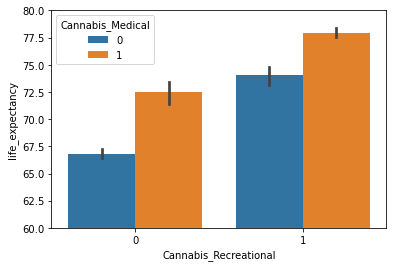

In [66]:
g = sns.barplot(x = 'Cannabis_Recreational', y ='life_expectancy', hue = 'Cannabis_Medical', data = life_expectancy)
g.set_ylim(60, 80)

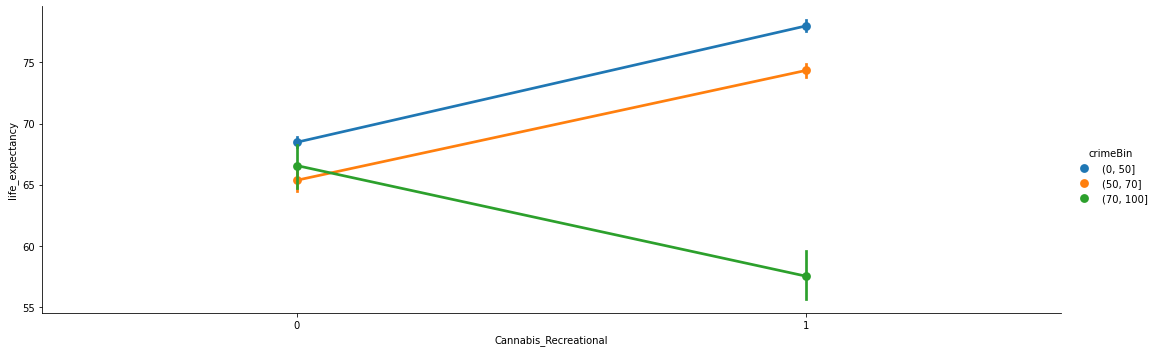

In [67]:
sns.factorplot(x='Cannabis_Recreational',y='life_expectancy', hue='crimeBin', data=life_expectancy,\
              aspect=3)

## Insights for finding 1:
* In the place where recreational legalization of Cannabis occurs, life expectancy increases only when the crime index level is lower than moderate on average. Once it hits 70, life expectancy decreases even though cannabis is recreational legal. In other words, if the country is comparatively safe, passing legalization of cannabis policy can help to improve citizens life expectancy. However, if a country has a high crime index, they probably need to prohibit cannabis for recreational use to maintain its life expectancy.

<h1 style="text-align:center;">NORMALIZATION OF DATASET</h1>

In [68]:
life_expectancy['above_70'] = life_expectancy.life_expectancy >= 70
life_expectancy['above_70'] = life_expectancy.above_70.astype(int)
X = life_expectancy.drop(['life_expectancy','latitude','crimeBin','above_70','Cigarettes_per_day','longitude','country', 'Year'], axis=1)
Y = life_expectancy.above_70

scaler = MinMaxScaler()
X = X.drop(['income_composition','Status','Cannabis_Recreational','Cannabis_Medical'], axis = 1)
col_X = X.columns.to_list()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = col_X
X_scaled.head()

X_scaled['income_composition'] = life_expectancy.income_composition
X_scaled['Status'] = life_expectancy.Status
X_scaled['Cannabis_Recreational'] = life_expectancy.Cannabis_Recreational
X_scaled['Cannabis_Medical'] = life_expectancy.Cannabis_Medical
X_scaled.head()

X = X_scaled
X.drop(['hepB','Measles ','deaths_U5','Polio','total_expenditure','diphtheria','hiv_aids','Schooling','income_composition'], axis = 1, inplace = True)

life_expectancy['le_bins'] = pd.cut(life_expectancy.life_expectancy,bins = [0,40,60,80,120])
life_expectancy['le_bins2'] = life_expectancy.life_expectancy.apply(lambda x : 0 if x <= 40 else (1 if 40 < x <=60 else (2 if 60 < x <=80 else 3)))
Y = life_expectancy.life_expectancy

## Finding 2: 
* With increasing life expectancy, we notice an increase in alcohol consumption. For countries with life expectancy above 58, citizens in countries where government spends more on healthcare were seen to be drinking more.

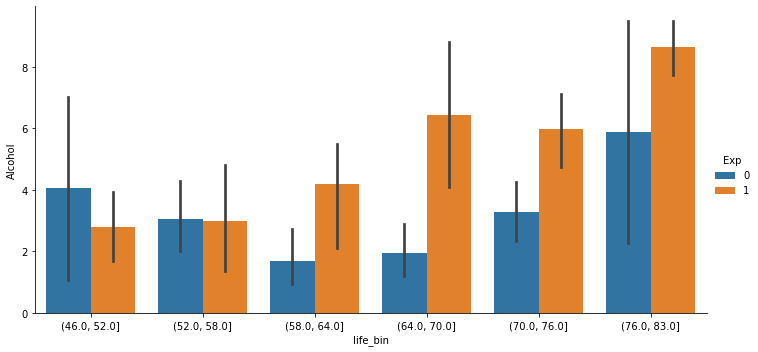

In [69]:
life_alcohol = life_expectancy.groupby(['country'])['Cigarettes_per_day','Status','life_expectancy',\
                                                    'total_expenditure','Alcohol','Depression_Population'].\
mean().sort_values(by='life_expectancy', ascending = False)

Exp_Mean = life_alcohol['total_expenditure'].mean()
life_alcohol['Exp'] = life_alcohol['total_expenditure'].apply(lambda x: 1 if x>Exp_Mean else 0)
life_alcohol['life_bin'] = pd.cut(life_alcohol.life_expectancy, bins = 6, precision=0)
sns.catplot(x = 'life_bin' , y = 'Alcohol', hue = 'Exp', kind='bar', data = life_alcohol, aspect=2)

## Insights for finding 2:
* This indicates that the government should spend more on healthcare expenditure to increase life expectancy. On the other hand, increasing alcohol consumption does not have a negative impact on life expectancy. That is, drinking alcohol might not be an essential factor to affect longevity of life.

## Finding 3: 
* A country with higher GDP per capita, which is a developed country, will have a higher life expectancy. A country with lower GDP per capita and a higher crime index, will have a lower life expectancy.

In [70]:
X_train, X_test, Y_train, Y_test = \
train_test_split(X,Y,test_size=0.3,random_state = 1)

dt = tree.DecisionTreeRegressor(max_depth=2)
dt.fit(X_train,Y_train)
y_pred = dt.predict(X_test)

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                            test_size=0.3,random_state=0)

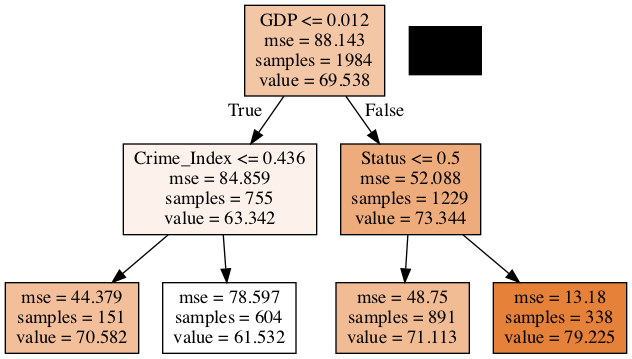

In [72]:
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

regs = [LinearRegression(), ElasticNet(), DecisionTreeRegressor(), GradientBoostingRegressor(), MLPRegressor()]#, SVR()]
 

In [74]:
import sklearn
minMAD = 10000000
nfolds = 3
bestREG = ''

for reg in regs:
    kf = KFold(n_splits=nfolds,random_state=0,shuffle=True)
    mad = sklearn.model_selection.cross_val_score(reg,X,Y,\
             cv=kf,scoring='neg_mean_absolute_error').mean()
    # need the lowest scoring for mad
    print (str(reg)[:25] + ' with mad= ' + str(mad) )
    if mad < minMAD:
        minMAD = mad
        bestREG = reg
        
print('***********************************************')
print ('Best Regressor is... ' + str(bestREG)[:25] )
print('**********************')
print ('With MAD Score ' + str(minMAD))
        

LinearRegression() with mad= -5.865644837353005
ElasticNet() with mad= -7.096615423685718
DecisionTreeRegressor() with mad= -2.0242328042328044
GradientBoostingRegressor with mad= -3.0402096561553864
MLPRegressor() with mad= -7.452818672566944
***********************************************
Best Regressor is... MLPRegressor()
**********************
With MAD Score -7.452818672566944


## Insights for finding 2:
* For the developed countries, the government might want to focus on increasing the GDP in order to get a better life expectancy.
* For the developing countries, the government must act on reducing the crime index.
